In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
from shapely.geometry import *
import json
%matplotlib inline

In [6]:
transit_data = pd.read_excel("C:\\Users\\tybty\\Downloads\\Transit Data.xlsx")
transit_data=transit_data[transit_data.Latitude>40]
transit_data=transit_data[transit_data.Longitude<-70]

In [12]:
print(transit_data['Route'].unique())

[ 12   2   1  13 601   7   8   3  15 701 502 501   6  14  11  20  18   4
  16  10  17]


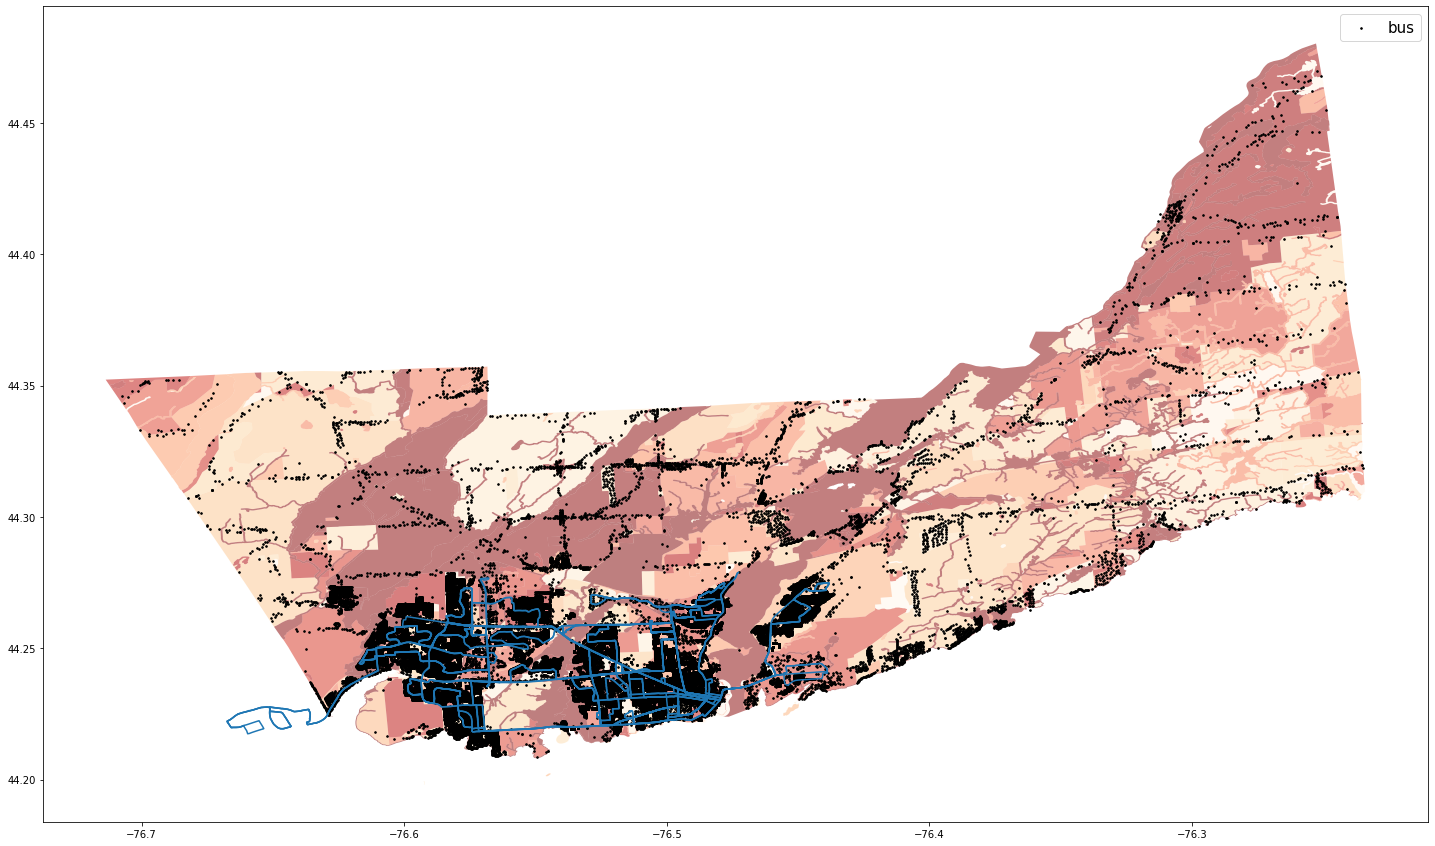

In [32]:
fig,ax=plt.subplots(figsize=(30,15))

street_map=gpd.read_file('C:\\Users\\tybty\\Desktop\\land-use-designation\\land-use-designation.shp')
street_map.plot(ax=ax, cmap='OrRd',alpha=0.5)


bus_map=gpd.read_file('C:\\Users\\tybty\\Desktop\\transit-gtfs-routes\\transit-gtfs-routes.shp')
bus_map.plot(ax=ax)

address=pd.read_excel("C:\\Users\\tybty\\\Desktop\\civic-addresses.xlsx")
geometry=[Point(xy) for xy in zip(address["Longitude"],address["Latitude"])]
geometry[:3]
crs={'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(address,crs=crs,geometry=geometry)
geo_df.head()
geo_df.plot(ax=ax,markersize=10,color="black",marker=".",label="bus")
plt.legend(prop={'size':15})

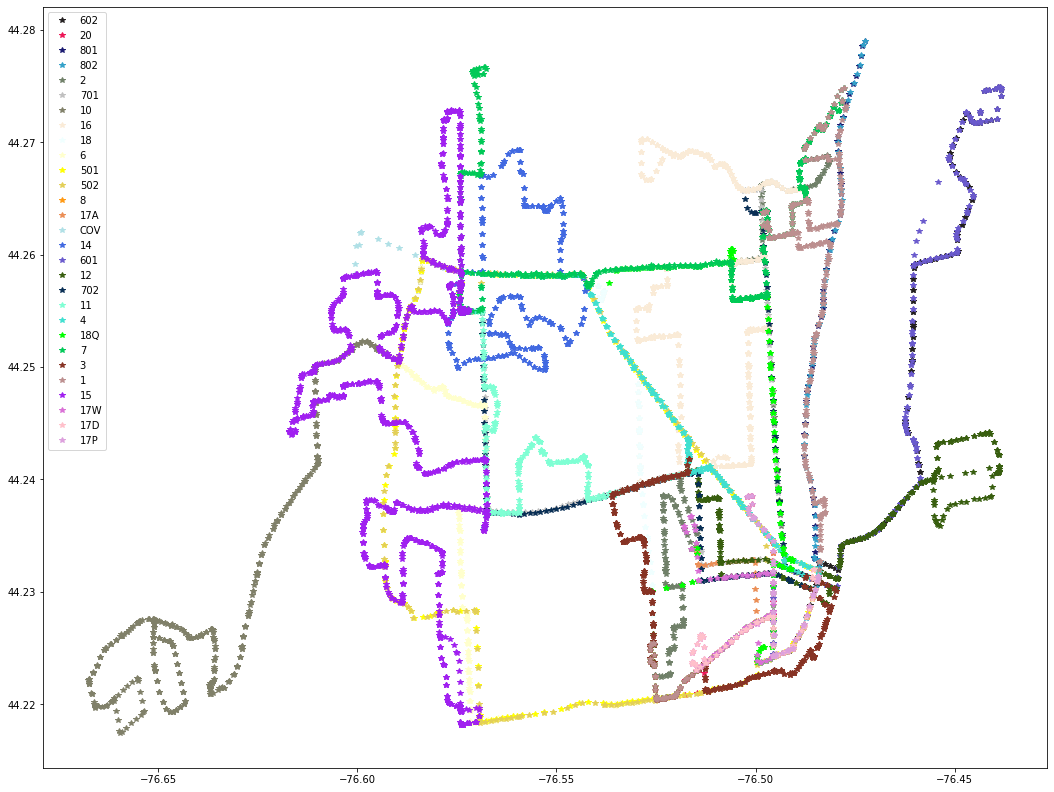

In [83]:
import numpy as np
transit_data2 = pd.read_excel("C:\\Users\\tybty\\Desktop\\transit-gtfs-routes.xlsx")
transit_data2=transit_data2.drop(19)
plt.figure(figsize=(18,14))
for index,row in transit_data2.iterrows():
    cordinates=row["Shape"].split('], [')
    x=np.arange(0).astype('float64')
    y=np.arange(0).astype('float64')
    for i in cordinates:
        x=np.append(x,float(i.replace('[','').replace(']','').split(',')[0]))
        y=np.append(y,float(i.replace('[','').replace(']','').split(',')[1]))
    plt.plot(x,y,'*',label=row["Short Name"],color=row["Color"])
    #for j in range(x.shape[0]):
     #   plt.plot(x[j:j+2],y[j:j+2],label=row["Short Name"],color=row["Color"],linewidth=3)
plt.legend()

In [36]:
transit_data.groupby(['Route'])['Bus'].min()

Route
1       315
2       315
3       519
4       620
6       519
7       315
8       315
10      315
11      519
12      315
13      620
14      315
15      315
16      620
17      620
18      315
20      620
501     620
502     315
601    1361
701     943
Name: Bus, dtype: int64

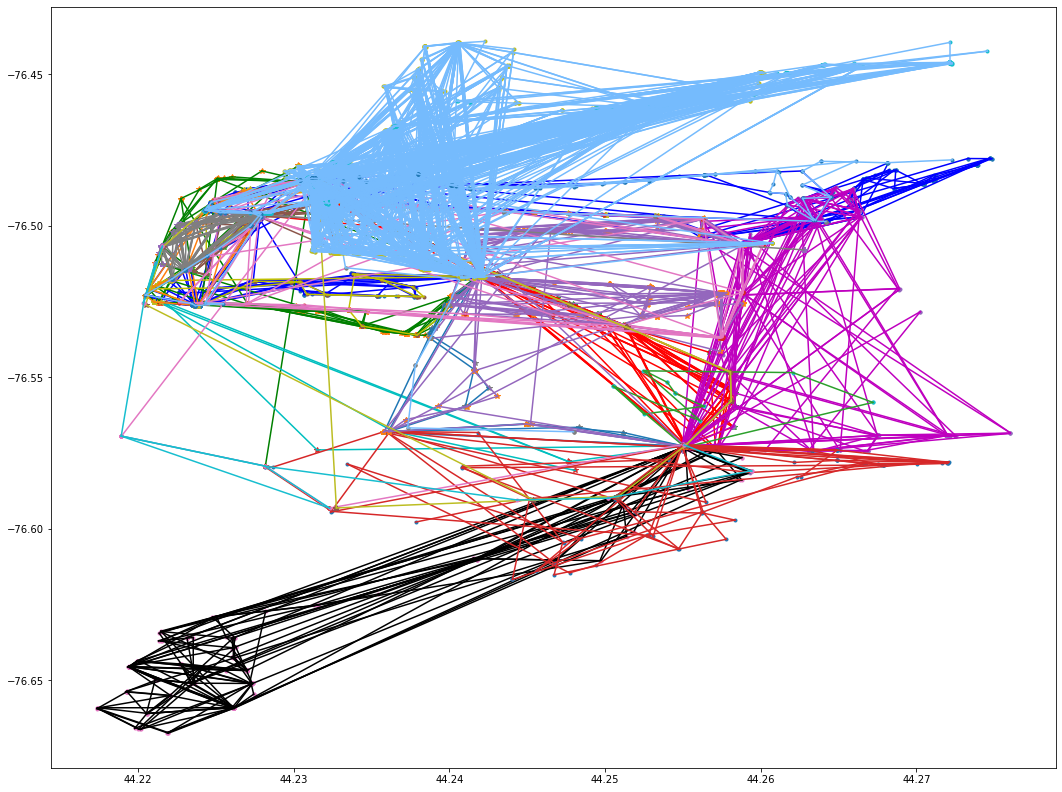

In [35]:
plt.figure(figsize=(18,14))


lines2=transit_data[(transit_data['Route']==2)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines2.transpose()
plt.plot(lines2['Latitude'],lines2['Longitude'],'.')
for i in range(lines2.shape[0]):
    plt.plot(lines2['Latitude'][i:i+2],lines2['Longitude'][i:i+2],'b')

lines3=transit_data[(transit_data['Route']==3)&(transit_data['Bus']==519)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines3.transpose()
plt.plot(lines3['Latitude'],lines3['Longitude'],'*')
for i in range(lines3.shape[0]):
    plt.plot(lines3['Latitude'][i:i+2],lines3['Longitude'][i:i+2],'g')

lines4=transit_data[(transit_data['Route']==4)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines4.transpose()
plt.plot(lines4['Latitude'],lines4['Longitude'],'*')
for i in range(lines4.shape[0]):
    plt.plot(lines4['Latitude'][i:i+2],lines4['Longitude'][i:i+2],'r')

lines6=transit_data[(transit_data['Route']==6)&(transit_data['Bus']==519)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines6.transpose()
plt.plot(lines6['Latitude'],lines6['Longitude'],'*')
for i in range(lines6.shape[0]):
    plt.plot(lines6['Latitude'][i:i+2],lines6['Longitude'][i:i+2],'c')

    
lines7=transit_data[(transit_data['Route']==7)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines7.transpose()
plt.plot(lines7['Latitude'],lines7['Longitude'],'.')
for i in range(lines7.shape[0]):
    plt.plot(lines7['Latitude'][i:i+2],lines7['Longitude'][i:i+2],'m')
    
lines8=transit_data[(transit_data['Route']==8)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines8.transpose()
plt.plot(lines8['Latitude'],lines8['Longitude'],'.')
for i in range(lines8.shape[0]):
    plt.plot(lines8['Latitude'][i:i+2],lines8['Longitude'][i:i+2],'y')

lines10=transit_data[(transit_data['Route']==10)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines10.transpose()
plt.plot(lines10['Latitude'],lines10['Longitude'],'.')
for i in range(lines10.shape[0]):
    plt.plot(lines10['Latitude'][i:i+2],lines10['Longitude'][i:i+2],'k')

lines11=transit_data[(transit_data['Route']==11)&(transit_data['Bus']==519)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines11.transpose()
plt.plot(lines11['Latitude'],lines11['Longitude'],'*')
for i in range(lines11.shape[0]):
    plt.plot(lines11['Latitude'][i:i+2],lines11['Longitude'][i:i+2],'tab:blue')
    
    



lines13=transit_data[(transit_data['Route']==13)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines13.transpose()
plt.plot(lines13['Latitude'],lines13['Longitude'],'*')
for i in range(lines13.shape[0]):
    plt.plot(lines13['Latitude'][i:i+2],lines13['Longitude'][i:i+2],'tab:orange')   


lines14=transit_data[(transit_data['Route']==14)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines14.transpose()
plt.plot(lines14['Latitude'],lines14['Longitude'],'.')
for i in range(lines14.shape[0]):
    plt.plot(lines14['Latitude'][i:i+2],lines14['Longitude'][i:i+2],'tab:green')
    
lines15=transit_data[(transit_data['Route']==15)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines15.transpose()
plt.plot(lines15['Latitude'],lines15['Longitude'],'.')
for i in range(lines15.shape[0]):
    plt.plot(lines15['Latitude'][i:i+2],lines15['Longitude'][i:i+2],'tab:red')

lines16=transit_data[(transit_data['Route']==16)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines16.transpose()
plt.plot(lines16['Latitude'],lines16['Longitude'],'*')
for i in range(lines16.shape[0]):
    plt.plot(lines16['Latitude'][i:i+2],lines16['Longitude'][i:i+2],'tab:purple')   

lines17=transit_data[(transit_data['Route']==17)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines17.transpose()
plt.plot(lines17['Latitude'],lines17['Longitude'],'*')
for i in range(lines17.shape[0]):
    plt.plot(lines17['Latitude'][i:i+2],lines17['Longitude'][i:i+2],'tab:brown')   

lines18=transit_data[(transit_data['Route']==18)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines18.transpose()
plt.plot(lines18['Latitude'],lines18['Longitude'],'.')
for i in range(lines18.shape[0]):
    plt.plot(lines18['Latitude'][i:i+2],lines18['Longitude'][i:i+2],'tab:pink')    
    
lines20=transit_data[(transit_data['Route']==20)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines20.transpose()
plt.plot(lines20['Latitude'],lines20['Longitude'],'*')
for i in range(lines20.shape[0]):
    plt.plot(lines20['Latitude'][i:i+2],lines20['Longitude'][i:i+2],'tab:gray')   

lines501=transit_data[(transit_data['Route']==501)&(transit_data['Bus']==620)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines501.transpose()
plt.plot(lines501['Latitude'],lines501['Longitude'],'*')
for i in range(lines501.shape[0]):
    plt.plot(lines501['Latitude'][i:i+2],lines501['Longitude'][i:i+2],'tab:olive')   

    
lines502=transit_data[(transit_data['Route']==502)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines502.transpose()
plt.plot(lines502['Latitude'],lines502['Longitude'],'.')
for i in range(lines502.shape[0]):
    plt.plot(lines502['Latitude'][i:i+2],lines502['Longitude'][i:i+2],'tab:cyan')


lines701=transit_data[(transit_data['Route']==701)&(transit_data['Bus']==943)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines701.transpose()
plt.plot(lines701['Latitude'],lines701['Longitude'],'.')
for i in range(lines701.shape[0]):
    plt.plot(lines701['Latitude'][i:i+2],lines701['Longitude'][i:i+2],'xkcd:sky blue')

lines12=transit_data[(transit_data['Route']==12)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines12.transpose()
plt.plot(lines12['Latitude'],lines12['Longitude'],'.')  
for i in range(lines12.shape[0]):
    plt.plot(lines12['Latitude'][i:i+2],lines12['Longitude'][i:i+2],'xkcd:sky blue')

lines601=transit_data[(transit_data['Route']==601)&(transit_data['Bus']==1361)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines601.transpose()
plt.plot(lines601['Latitude'],lines601['Longitude'],'.')  
for i in range(lines601.shape[0]):
    plt.plot(lines601['Latitude'][i:i+2],lines601['Longitude'][i:i+2],'xkcd:sky blue')

    
lines1=transit_data[(transit_data['Route']==1)&(transit_data['Bus']==315)].sort_values('Time').loc[:,'Latitude':'Longitude']
lines1.transpose()
plt.plot(lines1['Latitude'],lines1['Longitude'],'.')  
for i in range(lines1.shape[0]):
    plt.plot(lines1['Latitude'][i:i+2],lines1['Longitude'][i:i+2],'xkcd:sky blue')


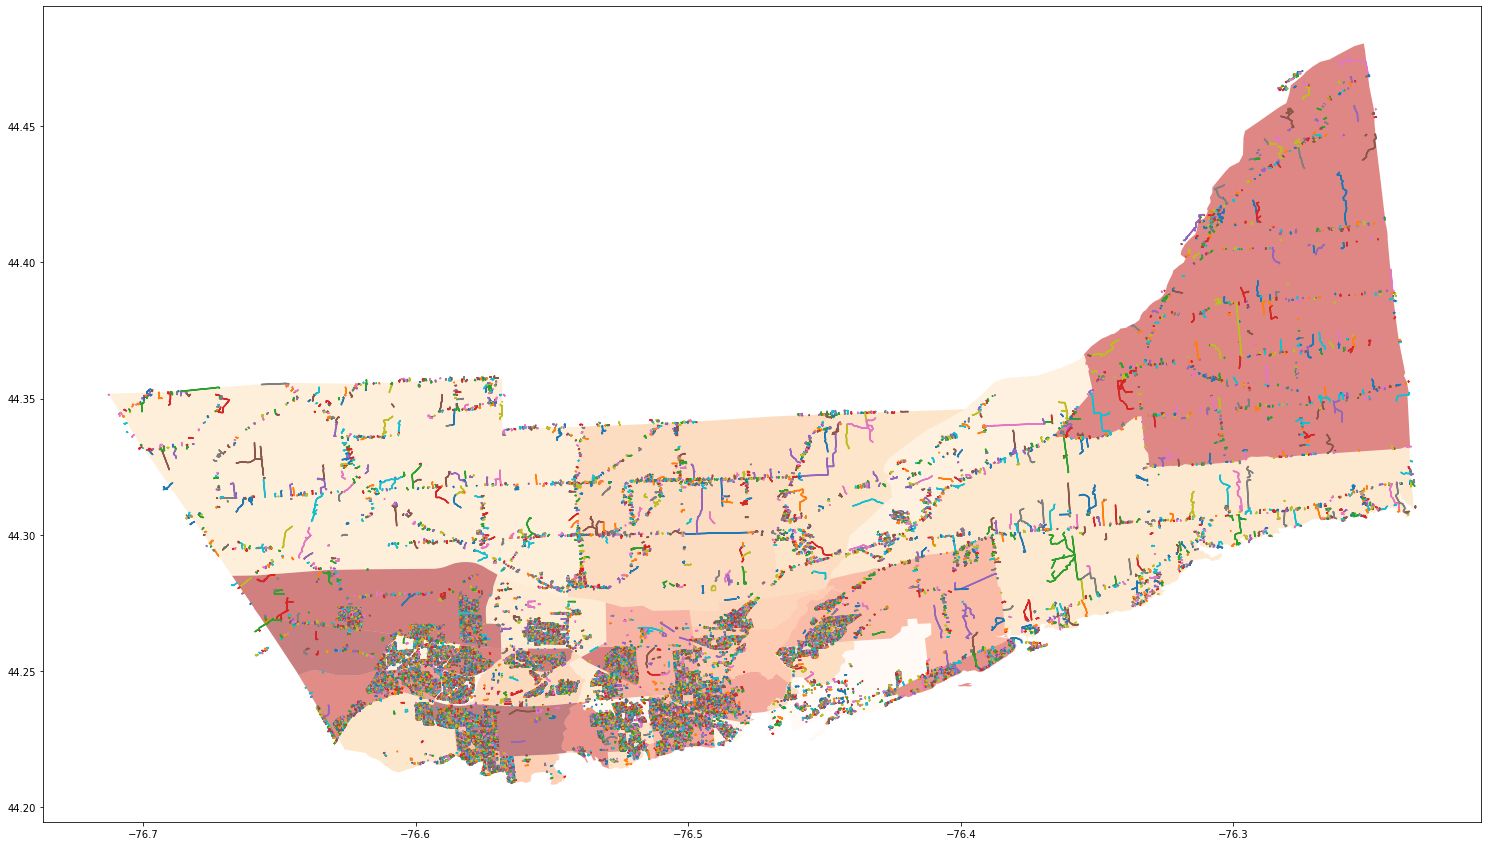

In [38]:
fig,ax=plt.subplots(figsize=(30,15))
neighbour_map=gpd.read_file('C:\\Users\\tybty\\Desktop\\neighbourhoods\\neighbourhoods.shp')
neighbour_map.plot(ax=ax, cmap='OrRd',alpha=0.5)
data = pd.read_json("C:\\Users\\tybty\\Downloads\\driveways.json")
for index,item in data.fields.items():
    if('geo_shape' in item.keys()):
         if(item['geo_shape']['type']=='Polygon'):
                polygon1=Polygon(item['geo_shape']['coordinates'][0])
                x,y = polygon1.exterior.xy
                plt.plot(x,y);

In [4]:
data2 = pd.read_json("C:\\Users\\tybty\\Downloads\\transit-gtfs-stops.json")
stop_list=[]
path_list=[]
for index,item in data2.fields.items():
    stop_list.append(Point(item['stop_coordinates']))    

count=0
data = pd.read_json("C:\\Users\\tybty\\Downloads\\driveways.json")
for index,item in data.fields.items():
    if('geo_shape' in item.keys()):
         if(item['geo_shape']['type']=='Polygon'):
            drive_way=Polygon(item['geo_shape']['coordinates'][0])
            for stop in stop_list:
                if(drive_way.intersects(stop)):
                    count=count+1
                    path_list.append(drive_way)
                    skip
                
print(count)

0


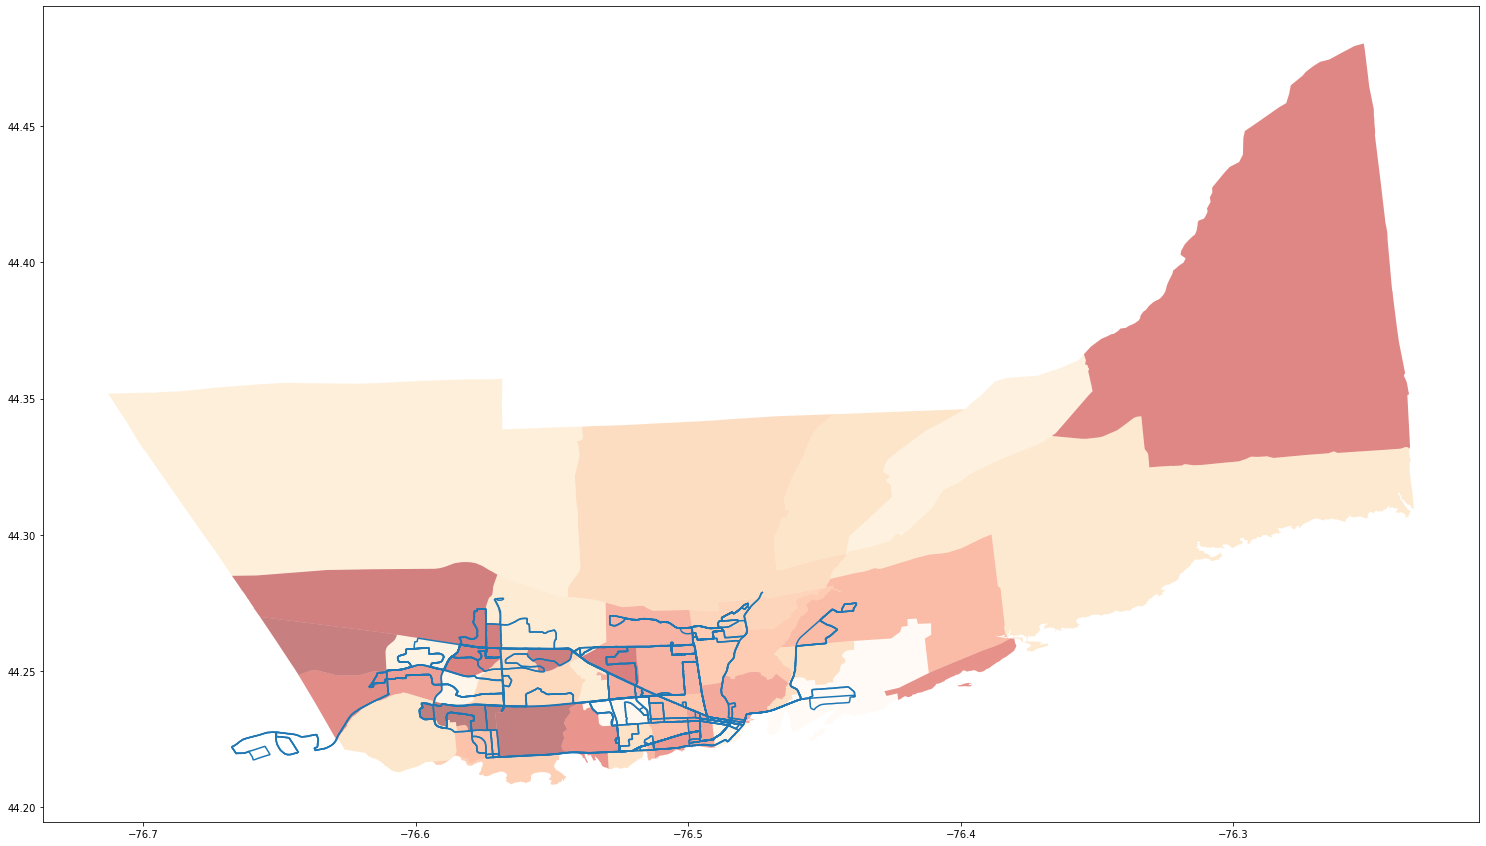

In [5]:
fig,ax=plt.subplots(figsize=(30,15))
neighbour_map=gpd.read_file('C:\\Users\\tybty\\Desktop\\neighbourhoods\\neighbourhoods.shp')
neighbour_map.plot(ax=ax, cmap='OrRd',alpha=0.5)
bus_map=gpd.read_file('C:\\Users\\tybty\\Desktop\\transit-gtfs-routes\\transit-gtfs-routes.shp')
bus_map.plot(ax=ax)
